<a href="https://colab.research.google.com/github/MaximilianoMoll/AICourse/blob/main/3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Classification

## 3.0 African Heart Disease Dataset
A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of Coronary Heart Disease (CHD). Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event.
In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in  Rousseauw et al, 1983, South African Medical Journal (https://journals.co.za/doi/abs/10.10520/AJA20785135_9894).

- sbp: systolic blood pressure
- tobacco: cumulative tobacco [kg]
- ldl: low density lipoprotein [mmol/L]
- adiposity: Adiposity Index
- famhist: family history of heart disease ([0/1]: Absent, Present)
- typea: type-A behavioral profile
- obesity: Body Mass Index [kg/m^2]
- alcohol: current alcohol consumption [L/yr]
- age: age at onset [yr]
- CLASS: chd, coronary heart disease ([0/1]: No/Yes)

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 3.1 Import Data

In [3]:
# Import Dataset
DS = pd.read_csv('saheart_1 withheader.csv')

# Visualize columns
print(DS.columns.tolist())

# Change -1 label to 0
DS.loc[DS['CLASS']==-1,'CLASS']=0

# Categorize LDL> population median (4.34)
print(DS['ldl'].median())
DS['ldl_cat']=0
DS.loc[DS['ldl']>DS['ldl'].median(),'ldl_cat']=1

# Binarize Tobacco
print(DS['tobacco'].median())
DS['tobacco_bin'] = 0
DS.loc[DS['tobacco']>DS['tobacco'].median(),'tobacco_bin'] = 1
DS

FileNotFoundError: ignored

### Plot Data

In [ ]:
# Look at the variable's distribution

plt.figure(figsize=(12,10))

plt.subplot(3,3,1)
DS[['sbp']].boxplot()

plt.subplot(3,3,2)
DS[['tobacco']].boxplot()

plt.subplot(3,3,3)
DS[['ldl']].boxplot()

plt.subplot(3,3,4)
DS[['adiposity']].boxplot()

plt.subplot(3,3,5)
DS[['typea']].boxplot()

plt.subplot(3,3,6)
DS[['obesity']].boxplot()

plt.subplot(3,3,7)
DS[['alcohol']].boxplot()

plt.subplot(3,3,8)
DS[['age']].boxplot()

plt.tight_layout()
plt.show()


In [ ]:
# When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
# %matplotlib inline
# Interactivity
#%matplotlib notebook

# Plot data distribution and scatterplot matrix, stratifying by "CLASS" variable
plt.figure()
sns.pairplot(DS, hue='ldl_cat', height=2.5)
plt.show()


In [ ]:
!apt update
!apt install imagemagick
!apt install pdf2svg
!apt install texlive texlive-latex-extra
!pip install git+https://github.com/mkrphys/ipython-tikzmagic.git

In [ ]:
%load_ext tikzmagic


In [ ]:

%%tikz -S test_output.tikz -f svg
\draw (1,0.5) circle (1);
\filldraw (1, 0.5) node {INPUT};

\draw[thick,->] (2,0.5) -- (3,0.5);

\draw (3,0) rectangle (5,1);
\filldraw (4, 0.5) node {MODEL};

\draw[thick,->] (5,0.5) -- (6,0.5);

\draw (7,0.5) circle (1);
\filldraw (7, 0.5) node {OUTPUT};

In [ ]:
%%tikz -S test_output.tikz -f svg
\draw (1,0.5) circle (1);
\filldraw (1, 0.5) node {FEATURES};

\draw[thick,->] (2,0.5) -- (3,0.5);

\draw (3,0) rectangle (5,1);
\filldraw (4, 0.5) node[scale=0.95] {ML MODEL};

\draw[thick,->] (5,0.5) -- (6,0.5);

\draw (7,0.5) circle (1);
\filldraw (7, 0.5) node[scale=0.85] {PREDICTION};

In [ ]:
%%tikz -S test_output.tikz -f svg
\draw (1,0.5) circle (1);
\filldraw (1, 0.5) node {AGE};

\draw[thick,->] (2,0.5) -- (2.75,0.5);

\draw (2.75,0) rectangle (5.5,1);
\filldraw (4, 0.75) node[scale=0.95] {LOGISTIC};
\filldraw (4, 0.25) node[scale=0.95] {REGRESSION};


\draw[thick,->] (5.5,0.5) -- (6,0.5);

\draw (7,0.5) circle (1);
\filldraw (7, 0.75) node {BINARY};
\filldraw (7, 0.25) node {OUTCOME};



## 3.2 What happen if we fit a LINEAR REGRESSION model for a binary outcome?

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     142.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           8.43e-21
Time:                        13:40:12   Log-Likelihood:                -27.706
No. Observations:                 100   AIC:                             59.41
Df Residuals:                      98   BIC:                             64.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1497      0.064     -2.339      0.0

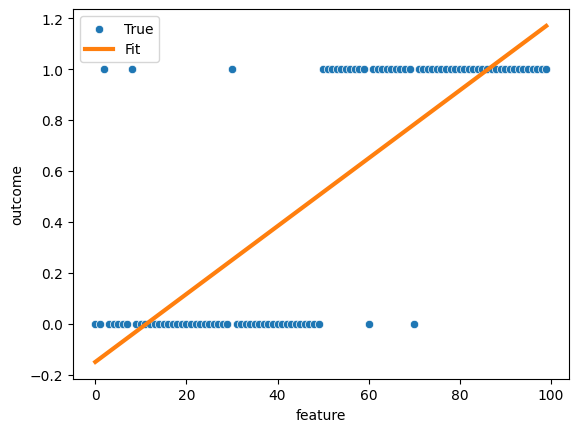

In [4]:
# Import libraries for statistical analyses
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Let's start by exploring the correlation with subject's obesity
# FIT GLM regression model

# Prepare some exmaplary data
DS_example = pd.DataFrame({'feature':list(np.arange(0,100))})
DS_example['outcome'] = 0
# Add some noisy observations
DS_example.loc[50:,'outcome'] = 1
DS_example.loc[[2,8,30],'outcome'] = 1
DS_example.loc[[60,70],'outcome'] = 0


mod = smf.ols(formula='outcome ~ 1 + feature', data=DS_example)
res = mod.fit()
print(res.summary())

# Get the modelled values
DS_example['pred'] = res.predict(DS_example)

def flatten(l):
    return [item for sublist in l for item in sublist]

sampleDS = pd.DataFrame({'feature':list(np.arange(0,100))})
sampleDS
DS_example['pred'] = res.predict(DS_example)
sampleDS['predictions'] = res.predict(sampleDS)

# Plot
plt.figure()
sns.scatterplot(data=DS_example, x='feature', y='outcome', color=sns.color_palette()[0] ,label='True')
sns.lineplot(data=sampleDS, x='feature', y='predictions', color=sns.color_palette()[1], label='Fit', linewidth=3)

plt.show()

It is clear that there might be some problems. Indeed, the output of our model is a continuous function that might be greater than 1 or less than 0 and mathematically it is represented by:
$y = 𝛽_0+𝛽_1 𝑋$


## 3.3 The Logistic Model

In this case, we would prefer mapping our outputs according in a way that it is limited in the 0-1 range and possibly linked to some concept of probability of being to class 1 with probability p(x), given the observation x. A particularly useful function in this case is the sigmoidal function with the form $f(x) = \frac{e^x}{1+e^x} = p(x)$, strictly linked with the concept of probability.

In particular we could use:
 $f(x) = \frac{e^{a+bx}}{1+e^{a+bx}} = p(x|a,b)$, as the probability of belonging to class-1 with the observed x given parameters a,b


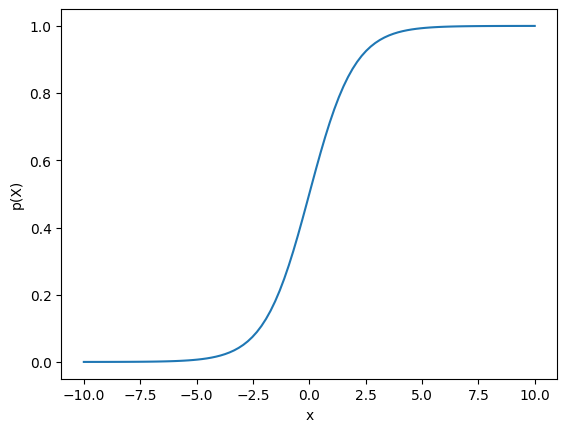

In [5]:
# Import matplotlib, numpy and math
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-10, 10, 100)
z = np.exp(x)/(1 + np.exp(x))

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("p(X)")

plt.show()

### Logistic Regression Example

Optimization terminated successfully.
         Current function value: 0.301526
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                  0.5649
Time:                        09:45:44   Log-Likelihood:                -30.153
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 8.923e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1771      1.048     -4.940      0.000      -7.231      -3.123
feature        0.1068      0.

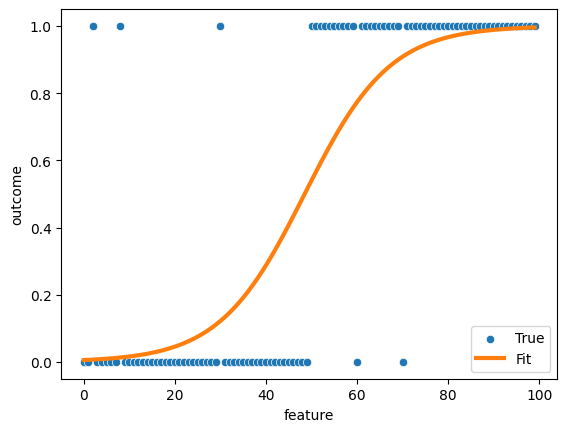

In [13]:
# Import libraries for statistical analyses
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Let's start by exploring the correlation with subject's obesity
# FIT GLM regression model

# Prepare some exmaplary data
DS_example = pd.DataFrame({'feature':list(np.arange(0,100))})
DS_example['outcome'] = 0
# Add some noisy observations
DS_example.loc[50:,'outcome'] = 1
DS_example.loc[[2,8,30],'outcome'] = 1
DS_example.loc[[60,70],'outcome'] = 0


mod = smf.logit(formula='outcome ~ 1 + feature', data=DS_example)
res = mod.fit()
print(res.summary())

# Get the modelled values
DS_example['pred'] = res.predict(DS_example)

def flatten(l):
    return [item for sublist in l for item in sublist]

sampleDS = pd.DataFrame({'feature':list(np.arange(0,100))})
sampleDS
DS_example['pred'] = res.predict(DS_example)
sampleDS['predictions'] = res.predict(sampleDS)

# Plot
plt.figure()
sns.scatterplot(data=DS_example, x='feature', y='outcome', color=sns.color_palette()[0] ,label='True')
sns.lineplot(data=sampleDS, x='feature', y='predictions', color=sns.color_palette()[1], label='Fit', linewidth=3)

plt.show()

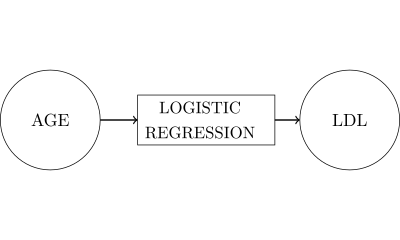

In [14]:
%%tikz -S test_output.tikz -f svg
\draw (1,0.5) circle (1);
\filldraw (1, 0.5) node {AGE};

\draw[thick,->] (2,0.5) -- (2.75,0.5);

\draw (2.75,0) rectangle (5.5,1);
\filldraw (4, 0.75) node[scale=0.95] {LOGISTIC};
\filldraw (4, 0.25) node[scale=0.95] {REGRESSION};


\draw[thick,->] (5.5,0.5) -- (6,0.5);

\draw (7,0.5) circle (1);
\filldraw (7, 0.5) node {LDL};

## 3.4 Applying Logistic Regression to Real Data

Optimization terminated successfully.
         Current function value: 0.645736
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                ldl_cat   No. Observations:                  462
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                 0.06839
Time:                        10:52:01   Log-Likelihood:                -298.33
converged:                       True   LL-Null:                       -320.23
Covariance Type:            nonrobust   LLR p-value:                 3.638e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9158      0.320     -5.980      0.000      -2.544      -1.288
age            0.0443      0.

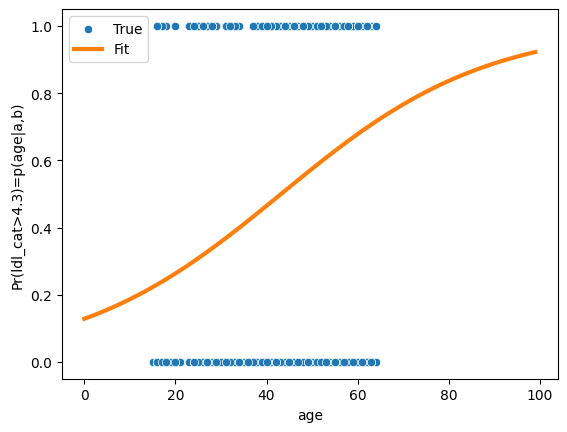

In [18]:
# Import libraries for statistical analyses
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Let's start by exploring the correlation with subject's obesity
# FIT LOGISTIC regression model
mod = smf.logit(formula='ldl_cat ~ 1 + age', data=DS)
res = mod.fit()
print(res.summary())

# Get the modelled values
DS['ldl_cat_pred'] = res.predict(DS)

def flatten(l):
    return [item for sublist in l for item in sublist]

sampleDS = pd.DataFrame({'age':list(np.arange(0,100))})
sampleDS
DS['ldl_cat_pred'] = res.predict(DS)
sampleDS['ldl_cat_sample'] = res.predict(sampleDS)

# Plot
plt.figure()
sns.scatterplot(data=DS, x='age', y='ldl_cat', color=sns.color_palette()[0] ,label='True')
sns.lineplot(data=sampleDS, x='age', y='ldl_cat_sample', color=sns.color_palette()[1], label='Fit', linewidth=3)
plt.ylabel('Pr(ldl_cat>4.3)=p(age|a,b)')
plt.show()

### Odds and Odds Ratio

Generally speaking, if an event happens with probability **P**, the ODDS of having the event are defined as **P/1-P**

Therefore, given the confusion matrix shown below:

\begin{array}{|c|c|c|}
\hline
& CASE & CONTROL \\
\hline
EXPOSED & A & B \\
\hline
UNEXPOSED & C & D \\
\hline
\end{array}

We can derive:
- Probability of being a CASE = $P_{case|exposed} = \frac{𝐴}{𝐴+𝐶}$
- Probability of being a CONTROL = $P_{control|exposed} = \frac{B}{B+D}$

- The **ODDS** of being a CASE when EXPOSED = $P_{case|exposed}/(1-P_{case|exposed})$=
$\cfrac{\cfrac{𝐴}{𝐴+B}}{1-\cfrac{𝐴}{𝐴+B}} = \cfrac{A}{B}$

- The **ODDS** of being a CONTROL when EXPOSED = $P_{control|exposed}/(1-P_{control|exposed})$=
$\cfrac{\cfrac{C}{C+D}}{1-\cfrac{C}{C+D}} = \cfrac{C}{D}$

Consequently, the **ODDS RATIO** can be defined as $OR = \cfrac{\cfrac{A}{B}}{\cfrac{C}{D}} = \cfrac{AD}{BC}$


If the 𝑶𝒅𝒅𝒔 𝑹𝒂𝒕𝒊𝒐 is greater than (>) 1 then there is a POSITIVE ASSOCIATION between the EXPOSURE and the CASE. Therefore, the CASE is more likely when we have an EXPOSURE.

If the 𝑶𝒅𝒅𝒔 𝑹𝒂𝒕𝒊𝒐 is smaller than (<) 1 then there is a NEGATIVE ASSOCIATION between the EXPOSURE and the CASE. Therefore, the CASE is less likely when we have an EXPOSURE.

If the 𝑶𝒅𝒅𝒔 𝑹𝒂𝒕𝒊𝒐 is equal to (=) 1 then there is NO ASSOCIATION between the EXPOSURE and the CASE



### Why Logistic Regression is so interesting?




The sigmoidal function is defined as:

- $p(x) = \frac{e^{𝛽x}}{1+e^{𝛽x}}$

- $p(x)(1+e^{𝛽x}) = e^{𝛽x}$

- $p(x) = e^{𝛽x} - p(x)e^{𝛽x} = (1-p(x))e^{𝛽x}$

- $\cfrac{p(x)}{1-p(x)} = e^{𝛽x}$

- $log(\cfrac{p(x)}{1-p(x)}) = 𝛽x$

If we consider then following sigmoidal function:
$p(x) = \frac{e^{x_0 + 𝛽_1x_1}}{1+e^{x_0+𝛽_1x_1}}$

it can also be written as:
- $log(\cfrac{p(x)}{1-p(x)}) = x_0 + 𝛽_1x_1$

And if we connect this concept with the ODDS RATIO:
- $log(ODDS) = x_0 + 𝛽_1x_1$


We can now derive the odds of being a case (p(X)=1) for two observations having $x1 = a_1$ and $x_1=a_1+1$, respectively $p(1|x_1=a_1)$ and $p(1|x_1=a_1+1)$.

- $ ODDS_1 = p(1|x_1=a_1) = e^{x_0 + 𝛽_1a_1}$
- $ ODDS_2 = p(1|x_1=a_1+1) = e^{x_0 + 𝛽_1(a_1+1)}$

and the $OR = \cfrac{ODDS_2}{ODDS_1} = \cfrac{e^{x_0 + 𝛽_1(a_1+1)}}{ e^{x_0 + 𝛽_1a_1}} = e^{x_0 + 𝛽_1a_1 + 𝛽_1 - x_0 - 𝛽_1 a_1} = e^{𝛽_1}$

So,

$log(ODDS) = 𝛽_1$

In conclusion, each coefficient of the logistic regression represents the log odds ratio due to an unitary increase in the corresponding observed parameter when keeping the others fixed.








In [22]:
# Import libraries for statistical analyses
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Let's start by exploring the correlation with subject's obesity
# FIT LOGISTIC regression model
mod = smf.logit(formula='ldl_cat ~ 1 + tobacco_bin', data=DS)
res = mod.fit()
print(res.summary())

# Get the modelled values
DS['ldl_cat_pred'] = res.predict(DS)

def flatten(l):
    return [item for sublist in l for item in sublist]

sampleDS = pd.DataFrame({'tobacco_bin':list(np.arange(0,  1, 0.01))})
sampleDS
DS['ldl_cat_pred'] = res.predict(DS)
sampleDS['ldl_cat_sample'] = res.predict(sampleDS)

Optimization terminated successfully.
         Current function value: 0.670476
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ldl_cat   No. Observations:                  462
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                 0.03269
Time:                        11:06:07   Log-Likelihood:                -309.76
converged:                       True   LL-Null:                       -320.23
Covariance Type:            nonrobust   LLR p-value:                 4.741e-06
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4340      0.134     -3.243      0.001      -0.696      -0.172
tobacco_bin     0.8615    

If we compute the odds ratio for high tobacco use: $ e^{0.8615} = 2.72 > 1$

This suggests that there is a positive association between a high tobacco use and a high LDL levels.   

## 3.5 Extension to more than one variable

If we want to model the contribution of more than one variable with some sort of importance, we can rearrange the sigmoid as:
$p(x)=\frac{e^{𝛽_0+𝛽_1 x_1+𝛽_2 x_2}}{1+e^{𝛽_0+𝛽_1 x_1+𝛽_2 x_2}}$

where we substituted the general expression of a linear model in the sigmoidal behavior.

Of note, with some rearrangements we can obtain the so-called **logit link function**:

$𝑙𝑜𝑔(\frac{𝑝(𝑋)}{1−𝑝(𝑋)})=𝛽_0+𝛽_1 x_1+𝛽_2 x_2$

Which results to be very similar to the expression of a linear regression model
$f(X) = 𝛽_0+𝛽_1 x_1+𝛽_2 x_2$

a.k.a
$f(X) = 𝛽_0+𝛽X$


where $f(X) = 𝑙𝑜𝑔(\frac{𝑝(𝑋)}{1−𝑝(𝑋)})$

**The previous eqivalences suggest that the linear regression framework can be generalized to different functions.**

This is exactly what **Generalized Linear Models** do.

## 3.6 Generalized Linear Models

### Statistical Definitions

#### Probability Mass Function

A probability mass function (PMF) is a function that gives the probability that a discrete random variable is exactly equal to some value, $𝑝(𝑥)=𝑃(𝑋=𝑥), 0≤𝑝(𝑥)≤1$

#### Probability Density Function
The probability density function (PDF) or 'density' of a continuous random variable, is a function whose value can be interpreted as providing a relative probability that the value of the random variable would be close to that sample.
Actually, the PDF is not bounded from 0 to 1, indeed PDF can be larger than 1 because it is a density (i.e. it is normalized according to support (bin) size, which for continuous variable is infinitely small).

A commonly used concept of probability for continuous random variables is the cumulative distribution function (CDF), i.e. the integral of the PDF: $F(𝑥)=𝑃(𝑋≤𝑥)= \int_{-\infty}^{x} 𝑝(𝑠)𝑑𝑠$.

If the PDF is conditioned on some fixed external parameters θ, it can be written as
$p(x|θ)=p_θ(x)$ and its CDF will be expressed as $F(𝑥|θ) = 𝑃(𝑋≤𝑥|θ)$.    

#### Likelihood Function
The Likelihood function ($L$), or 'Likelihood', describes the joint probability of the observed data, the PDF $p(x|θ)$, but viewed as a function of the parameters of the **chosen** statistical model and it is commonly indicated as $L(θ|x)$. Likelihood tells you the probability (under the chosen model) of the oberserved data if data was generated according to that set of θ.

#### Likelihood and PDF
Although conceptually different, mathematically Likelihood and PDF are equal and they answer to the same question, "What is the probability of having the observed data X given for a specific set of parameters θ?" but from different point of views.

### Gaussian Example
$p(x|θ) = p(x|μ,σ) = \frac1{\sqrt{2\pi\sigma^2}}{e}^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} = L(μ,σ|x) = L(θ|x)$

### Binomial Example
$p(x|θ) = p(x|P,N) = \prod\limits_{i:y_i=1}^N P \prod\limits_{i:y_i=0}^N (1-P) = L(P,N|x) = L(θ|x)$

Usually N, the number of observations, is fixed, therefore:

$p(x|θ) = p(x|P) = \prod\limits_{i:y_i=1} P \prod\limits_{i:y_i=0} (1-P) = L(P|x) = L(θ|x)$

where P represents the probability of belonging to class 1 ($y_i=1$) for each observation $i$, and N the total number of observations

### Posterior Probability
Note that Likelihood is NOT a posterior probability $p(θ|x)$. Indeed, the posterior is the joint probability of a set of parameters θ given the evidence data X.
Likelihood and Posterior are linked through the Bayes' Theorem Formula:

$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$

Therefore,

$p(θ|x) = p(x|θ)\frac{p(θ)}{p(x)} = L(θ|x)\frac{p(θ)}{p(x)}$

$Posterior = Likelihood\frac{Prior}{Marginalization}$

### Maximum Likelihood Estimation
In order to estimate the optimal set of parameters θ, numerical algorithms aim at maximizing the Likelihood function!

This is what happens when applying Generalized Linear Models.

## Practizing with Generalized Linear Models - The Logistic Regression

In order to analyze categorical data with linear regression, we need

                 Generalized Linear Model Regression Results                  
Dep. Variable:                ldl_cat   No. Observations:                  462
Model:                            GLM   Df Residuals:                      460
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -298.33
Date:                Mon, 06 Nov 2023   Deviance:                       596.66
Time:                        11:25:01   Pearson chi2:                     460.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09045
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9158      0.320     -5.980      0.0

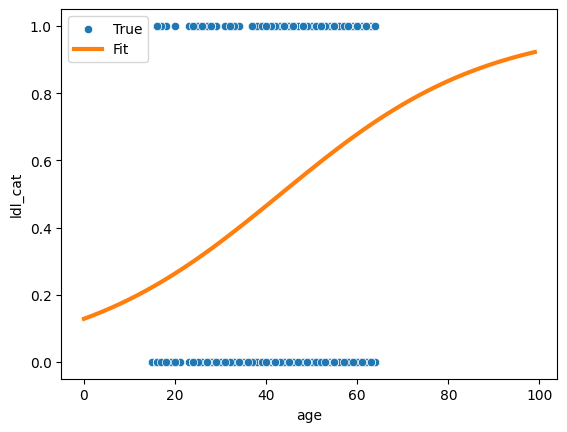

In [ ]:
# Import libraries for statistical analyses
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Let's start by exploring the correlation with subject's obesity
# FIT GLM regression model
mod = smf.glm(formula='ldl_cat ~ 1 + age', data=DS, family=sm.families.Binomial())
res = mod.fit()
print(res.summary())

# Get the modelled values
DS['ldl_cat_pred'] = res.predict(DS)

def flatten(l):
    return [item for sublist in l for item in sublist]

sampleDS = pd.DataFrame({'age':list(np.arange(0,100))})
sampleDS
DS['ldl_cat_pred'] = res.predict(DS)
sampleDS['ldl_cat_sample'] = res.predict(sampleDS)

# Plot
plt.figure()
sns.scatterplot(data=DS, x='age', y='ldl_cat', color=sns.color_palette()[0] ,label='True')
sns.lineplot(data=sampleDS, x='age', y='ldl_cat_sample', color=sns.color_palette()[1], label='Fit', linewidth=3)

plt.show()

# N.B: This is DESCRIPTIVE statistics because we are using all the data to fit the model and we are making the predictions on the same input data.

### Add Categorical Features

When a binary variable (0-1) is added to the model, we are implicitly defining two differentmodels:

tobacco = 0: adiposity = θ + α * obesity_sqrt2 => REFERENCE MODEL

tobacco = 1: adiposity = θ + α * obesity_sqrt2 + β * tobacco

which can be rearranged:

tobacco = 1: adiposity = (θ+β) + α * obesity_sqrt2

so, we are simply shifting the model's intercept

False    234
True     228
Name: tobacco_bin, dtype: int64
                 Generalized Linear Model Regression Results                  
Dep. Variable:                ldl_cat   No. Observations:                  462
Model:                            GLM   Df Residuals:                      459
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -296.56
Date:                Mon, 06 Nov 2023   Deviance:                       593.13
Time:                        11:27:30   Pearson chi2:                     460.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09738
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

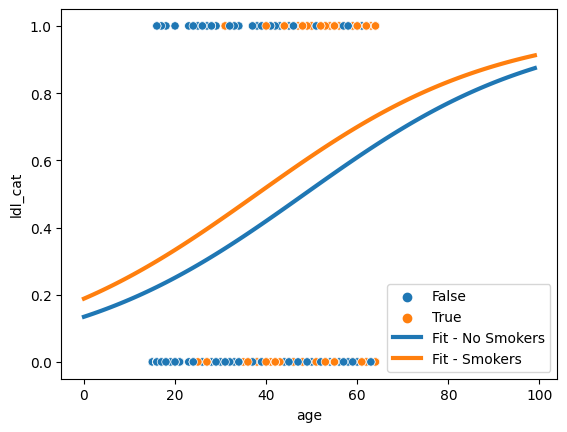

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import cm

# Add categorical information
DS['tobacco_bin'] = DS['tobacco_bin']==1
print(DS['tobacco_bin'].value_counts())
mod = smf.glm(formula='ldl_cat ~ 1 + age + tobacco_bin', data=DS, family=sm.families.Binomial())
res = mod.fit()
print(res.summary())

DS['ldl_cat_pred'] = res.predict(DS)

def flatten(l):
    return [item for sublist in l for item in sublist]

sampleDS = pd.DataFrame({'age':flatten([list(np.arange(0,100)),list(np.arange(0,100))]),'tobacco_bin':flatten([[False]*100,[True]*100])})
sampleDS
DS['ldl_cat_pred'] = res.predict(DS)
sampleDS['ldl_cat_sample'] = res.predict(sampleDS)


# Compare the LINEAR model with the SQRT model
plt.figure()
sns.scatterplot(data=DS, x='age', y='ldl_cat', color=sns.color_palette() , hue='tobacco_bin')
sns.lineplot(data=sampleDS[sampleDS['tobacco_bin']==0], x='age', y='ldl_cat_sample', color=sns.color_palette()[0], label='Fit - No Smokers', linewidth=3)
sns.lineplot(data=sampleDS[sampleDS['tobacco_bin']==1], x='age', y='ldl_cat_sample', color=sns.color_palette()[1], label='Fit - Smokers', linewidth=3)
plt.show()


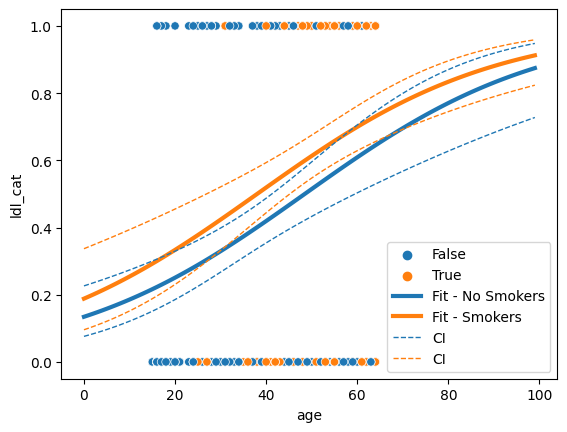

In [ ]:
# Let's add also confidence intervals
predictions = res.get_prediction(sampleDS)
pred_summ = predictions.summary_frame(alpha=0.05)

sampleDS['lower'] = pred_summ['mean_ci_lower']
sampleDS['upper'] = pred_summ['mean_ci_upper']

plt.figure()
sns.scatterplot(data=DS, x='age', y='ldl_cat', color=sns.color_palette() , hue='tobacco_bin')
sns.lineplot(data=sampleDS[sampleDS['tobacco_bin']==0], x='age', y='ldl_cat_sample', color=sns.color_palette()[0], label='Fit - No Smokers', linewidth=3)
sns.lineplot(data=sampleDS[sampleDS['tobacco_bin']==1], x='age', y='ldl_cat_sample', color=sns.color_palette()[1], label='Fit - Smokers', linewidth=3)
sns.lineplot(data=sampleDS[sampleDS['tobacco_bin']==0], x='age', y='lower', color=sns.color_palette()[0], linestyle='--', label='CI', linewidth=1)
sns.lineplot(data=sampleDS[sampleDS['tobacco_bin']==1], x='age', y='lower', color=sns.color_palette()[1], linestyle='--', label='CI', linewidth=1)
sns.lineplot(data=sampleDS[sampleDS['tobacco_bin']==0], x='age', y='upper', color=sns.color_palette()[0], linestyle='--', linewidth=1)
sns.lineplot(data=sampleDS[sampleDS['tobacco_bin']==1], x='age', y='upper', color=sns.color_palette()[1], linestyle='--', linewidth=1)
plt.show()

### Explore Interaction Effects

What if we would like to vary also the slope of our model according to a binary variable?

This can be done with interaction effects.

There are two possible approaches:

1.   ldl_cat = θ + φ * age*tobacco
2.   ldl_cat = θ + α * age + β * tobacco + φ * age * tobacco

In case 1 we simply create a new variable as the interaction (product) between the two. However, we are not able to separate the amount of variability explained from the interaction w.r.t the one explained by the original variables alone.
Case 2 accounts for this last problem by creating a model that can be rearranged as:

*   tobacco = 1: ldl_cat = (θ + β) + (α + φ) * age

so, we will shift both the model's intercept and its slope



                            OLS Regression Results                            
Dep. Variable:                ldl_cat   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     24.71
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           6.41e-11
Time:                        12:00:40   Log-Likelihood:                -311.69
No. Observations:                 462   AIC:                             629.4
Df Residuals:                     459   BIC:                             641.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

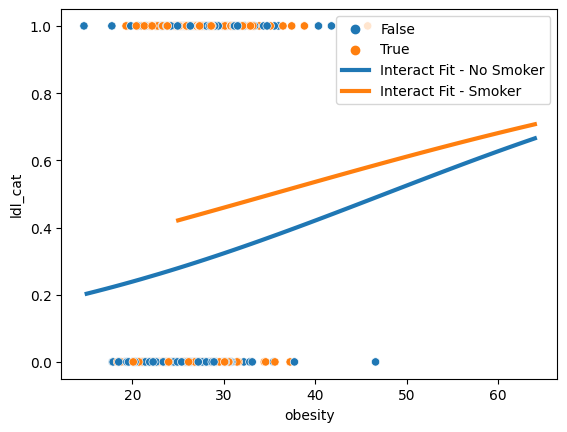

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import cm

# Add categorical information - CASE 1
mod = smf.ols(formula='ldl_cat ~ 1 + age:tobacco_bin', data=DS)
res = mod.fit()
print(res.summary())

# The interaction seems to be significant. However,
# We need to add all the baseline terms to assess if that's true

# Add categorical information - CASE 2
mod = smf.glm(formula='ldl_cat ~ 1 + age*tobacco_bin', data=DS, family=sm.families.Binomial())
res = mod.fit()
print(res.summary())

DS['ldl_cat_pred'] = res.predict(DS)

# AGE is still significant, tobacco and interaction term are not, therefore
# we can conclude that the interaction has no effect on LDL.
# So we can stick with: 'ldl_cat ~ 1 + age'

### Add Continuous Variable

In [ ]:
# Give permissions to isntall third-party software
from google.colab import output
output.enable_custom_widget_manager()
!pip install ipympl

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                ldl_cat   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     38.87
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           2.55e-16
Time:                        12:14:26   Log-Likelihood:                -299.17
No. Observations:                 462   AIC:                             604.3
Df Residuals:                     459   BIC:                             616.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5885      0.138     -4.275      0.0

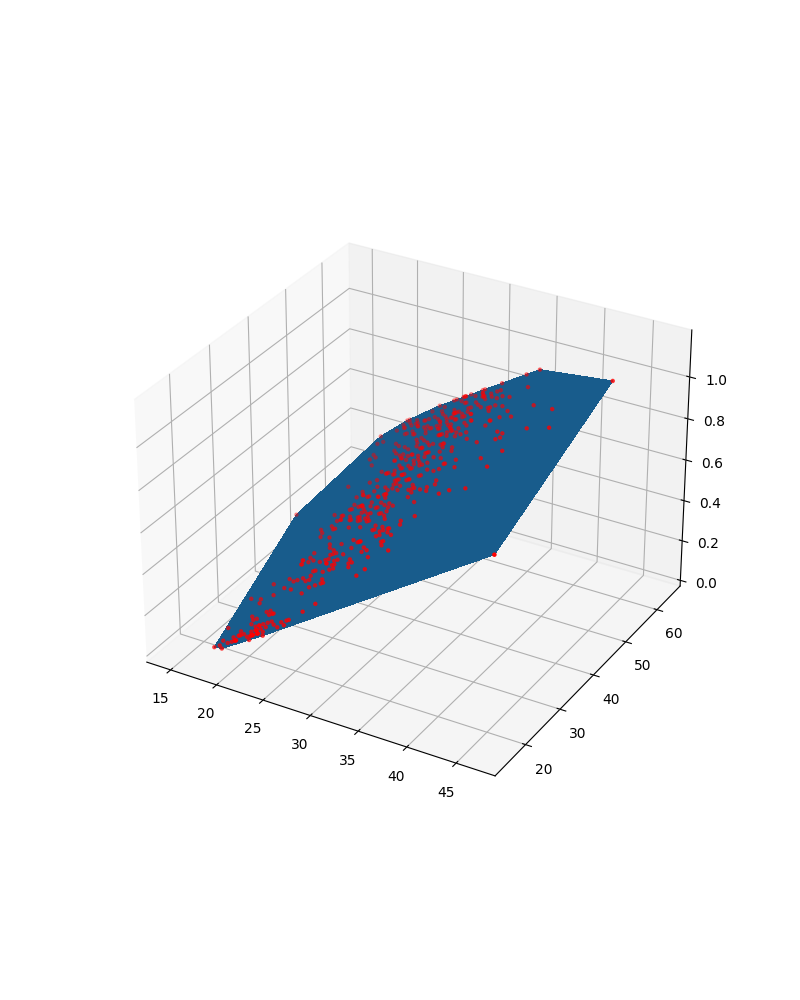

In [ ]:

#%matplotlib inline
%matplotlib widget

import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import cm

# Add categorical information - CASE 1
mod = smf.ols(formula='ldl_cat ~ 1 + obesity + age', data=DS, family=sm.families.Binomial())
res = mod.fit()
print(res.summary())

DS['ldl_pred_age'] = res.predict(DS)

X, Y = np.meshgrid(DS['obesity'], DS['age'])
# plot the surface
#fig = plt.figure()
fig, ax3 = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8,10))
#plt3d = fig.add_subplot(projection='3d')
ax3.plot_trisurf(DS['obesity'], DS['age'], DS['ldl_pred_age'], color=sns.color_palette()[0], linewidth=0, antialiased=False)
# Ensure that the next plot doesn't overwrite the first plot
ax = plt.gca()
#ax.hold(True)

ax.scatter(DS['obesity'], DS['age'], DS['ldl_pred_age'], color='red',marker='.')
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                ldl_cat   No. Observations:                  462
Model:                            GLM   Df Residuals:                      459
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -284.24
Date:                Mon, 06 Nov 2023   Deviance:                       568.49
Time:                        12:40:20   Pearson chi2:                     465.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1443
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1208      0.740     -6.918      0.0

<ipython-input-80-677abdc94daf>:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax3 = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8,10))


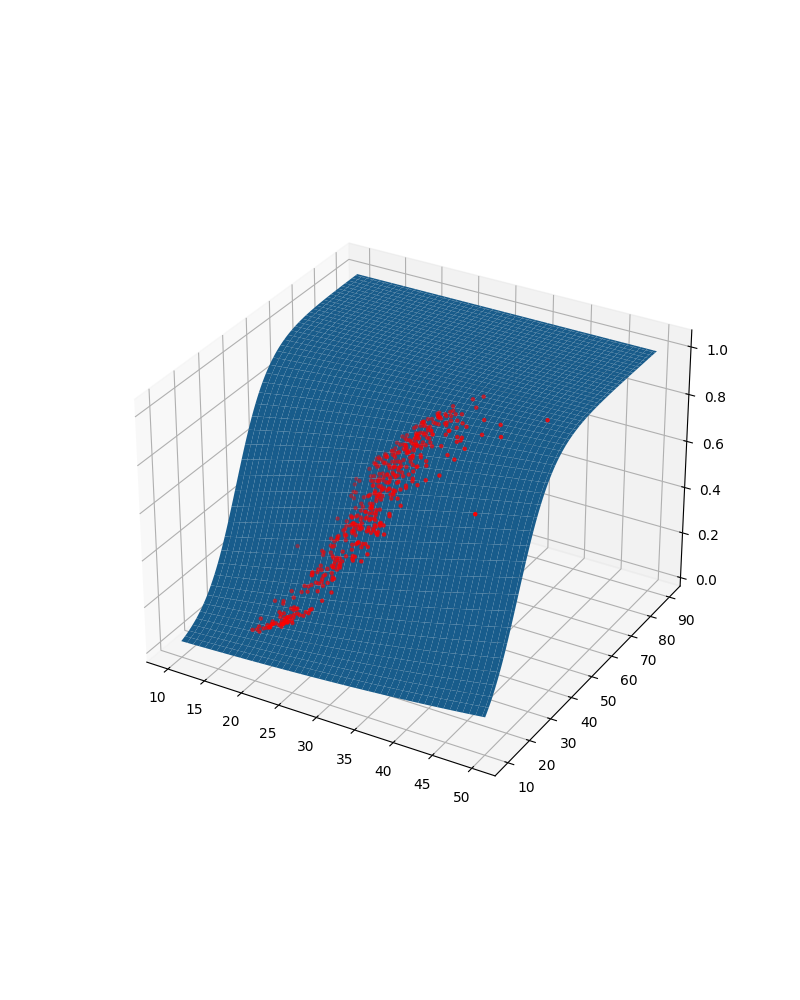

In [ ]:

#%matplotlib inline
%matplotlib widget

import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import cm

# Add categorical information - CASE 1
mod = smf.glm(formula='ldl_cat ~ 1 + obesity + age', data=DS, family=sm.families.Binomial())
res = mod.fit()
print(res.summary())

DS['ldl_pred_age'] = res.predict(DS)

def flatten(l):
    return [item for sublist in l for item in sublist]

sampleDS = pd.DataFrame({'age':flatten([list(np.linspace(10,90,100))]),
                         'obesity':flatten([list(np.linspace(10,50,100))])})
sampleDS

X, Y = np.meshgrid(sampleDS['obesity'], sampleDS['age'])

Z = []
for i,j in zip(X,Y):
  ds = pd.DataFrame({'age':i,'obesity':j})
  Z.append(res.predict(ds))
Z = np.asarray(Z)


# plot the surface
#fig = plt.figure()
fig, ax3 = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8,10))
#plt3d = fig.add_subplot(projectizon='3d')
ax3.plot_surface(X, Y, Z, color=sns.color_palette()[0])
# Ensure that the next plot doesn't overwrite the first plot
ax = plt.gca()
#ax.hold(True)

ax.scatter(DS['obesity'], DS['age'], DS['ldl_pred_age'], color='red',marker='.')
plt.show()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import cm

# Add categorical information - CASE 1
mod = smf.glm(formula='ldl_cat ~ 1 + age + obesity + adiposity + sbp + typea + tobacco_bin', data=DS, family=sm.families.Binomial())
res = mod.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                ldl_cat   No. Observations:                  462
Model:                            GLM   Df Residuals:                      455
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -273.86
Date:                Mon, 06 Nov 2023   Deviance:                       547.72
Time:                        14:35:03   Pearson chi2:                     471.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1819
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -4.4938    

,adiposity,age,sbp,tobacco_bin,obesity,ldl,alcohol,typea
adiposity,1.000000,0.625954,0.356500,0.292565,0.716556,0.440432,0.100330,-0.043144
age,0.625954,1.000000,0.388771,0.451519,0.291777,0.311799,0.101125,-0.102606
sbp,0.356500,0.388771,1.000000,0.191469,0.238067,0.158296,0.140096,-0.057454
tobacco_bin,0.292565,0.451519,0.191469,1.000000,0.121836,0.206052,0.246542,-0.003394
obesity,0.716556,0.291777,0.238067,0.121836,1.000000,0.330506,0.051620,0.074006
ldl,0.440432,0.311799,0.158296,0.206052,0.330506,1.000000,-0.033403,0.044048
alcohol,0.100330,0.101125,0.140096,0.246542,0.051620,-0.033403,1.000000,0.039498
typea,-0.043144,-0.102606,-0.057454,-0.003394,0.074006,0.044048,0.039498,1.000000


<Axes: >

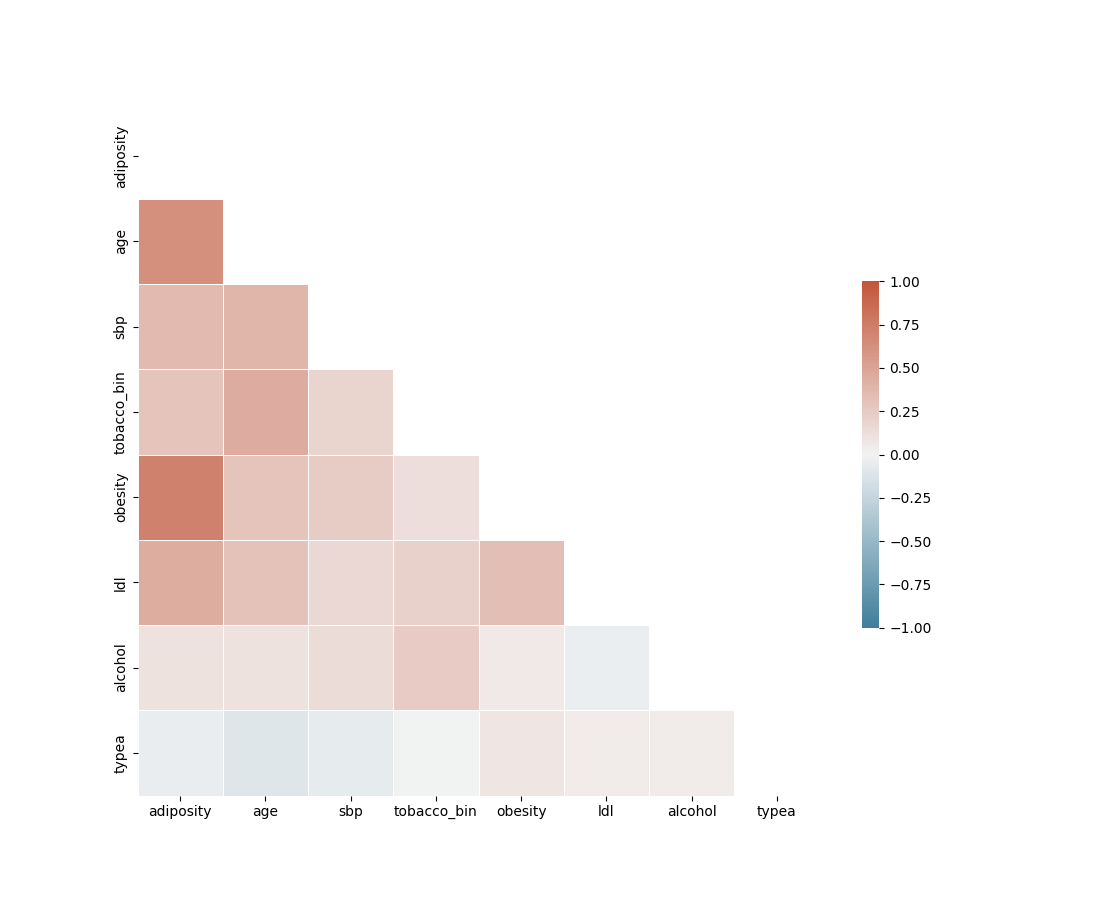

In [ ]:
# Compute the correlation matrix
corr = DS[['adiposity','age','sbp','tobacco_bin','obesity','ldl','alcohol','typea']].corr()
display(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import cm

# Add categorical information - CASE 1
mod = smf.glm(formula='ldl_cat ~ 1 + age + adiposity + sbp + typea + tobacco_bin', data=DS, family=sm.families.Binomial())
res = mod.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                ldl_cat   No. Observations:                  462
Model:                            GLM   Df Residuals:                      456
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -274.24
Date:                Mon, 06 Nov 2023   Deviance:                       548.47
Time:                        14:36:36   Pearson chi2:                     470.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1805
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -4.0128    

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# train-test split (70% train, 30% test)

X_train, X_test, y_train, y_test = train_test_split(DS[['age','sbp','tobacco_bin','obesity','adiposity']], DS['ldl_cat'], test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(DS[['age','sbp','tobacco_bin','obesity','ldl','alcohol','typea']], DS['adiposity'], test_size=0.3, random_state=42)

# Create Linear Regression Model
model = LogisticRegression()

# Fit the model while optimizing the hyperparameters with a grid search.
model.fit(X_train, y_train)

# Compute predictions on training and tests sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

display(y_train_pred)
display(y_test_pred)

# Compute predictions on training and tests sets
y_train_pred_proba = model.predict_proba(X_train)
y_test_pred_proba = model.predict_proba(X_test)

display(y_train_pred_proba)
display(y_test_pred_proba)


In this code:

We load the Iris dataset and convert it into a binary classification problem by classifying whether a sample is Setosa (class 0) or not Setosa (class 1).

The data is split into training and testing sets.

The features are standardized to have a mean of 0 and standard deviation of 1.

We train a logistic regression model, make predictions, and evaluate the model using a confusion matrix, classification report, ROC AUC score, and accuracy.

Finally, we plot the ROC curve to visualize the model's performance.

You can adapt this code to your specific dataset and binary classification problem.

In this updated code:

We calculate and plot the precision-recall curve and compute the average precision (AP).

The additional evaluation metrics, such as F1 score, precision (PPV), negative predictive value (NPV), sensitivity (recall), and specificity, are computed and displayed.

In [ ]:

# Evaluate the model
def assessClassification(y_true, y_pred_proba, thr):
  import matplotlib.pyplot as plt
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
  from sklearn.metrics import precision_recall_curve, average_precision_score, accuracy_score, f1_score
  from sklearn.metrics import precision_score, recall_score, auc

  # Create and display confusion Matrix
  confusion = confusion_matrix(y_true, y_pred_proba>thr)
  tn, fp, fn, tp = confusion.ravel()
  print("Confusion Matrix:")
  print(confusion)

  # Plot Confusion Matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=model.classes_)
  disp.plot()

  # Additional evaluation metrics
  precision = tp / (tp+fp) # a.k.a. positive predictive value (ppv)
  ppv = precision
  npv = tn / (tn+fn)
  sensitivity = tp / (tp+fn) # a.k.a. recall
  specificity = tn / (tn+fp)
  accuracy = (tp+tn) / (tp+tn+fp+fn) # accuracy_score(y_true, y_pred_proba>thr)
  f1 = 2*tp / (2*tp + fn + fp) # f1_score(y_test, y_pred_proba>thr)

  print(f"Precision (PPV): {ppv:.2f}")
  print(f"Negative Predictive Value (NPV): {npv:.2f}")
  print(f"Sensitivity (Recall): {sensitivity:.2f}")
  print(f"Specificity: {specificity:.2f}")
  print(f"Accuracy: {accuracy:.2f}")
  print(f"\nF1 Score: {f1:.2f}")

  # Generate automatic report
  classification_rep = classification_report(y_true, y_pred_proba>thr)
  print("\nClassification Report:")
  print(classification_rep)

  # Plot ROC curve
  fpr_roc, tpr_roc, _ = roc_curve(y_true, y_pred_proba)
  roc_auc = auc(fpr_roc, tpr_roc)
  print(f"\nROC AUC Score: {roc_auc:.2f}")

  # Plot Precision-Recall curve
  precision_prc, recall_prc, _ = precision_recall_curve(y_true, y_pred_proba)
  prc_auc = auc(recall_prc, precision_prc)
  average_precision = average_precision_score(y_true, y_pred_proba)
  proportion = sum(y_true)/len(y_true)
  print(f"\nPRC AUC Score: {prc_auc:.2f}")
  print(f"\nAverage Precision = {average_precision:.2f}")

  # Plot results
  plt.figure(figsize=(10, 5))

  # ROC Curve
  plt.subplot(1, 2, 1)
  plt.plot(fpr_roc, tpr_roc, label=f'ROC curve (AUROC = {roc_auc:.2f})')
  plt.plot(1-specificity, sensitivity, 'r*', label = f'{thr:.2f} Threshold')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')

  # Precision-Recall Curve
  plt.subplot(1, 2, 2)
  plt.plot(recall_prc, precision_prc, label=f'Precision-Recall curve (AUPRC = {prc_auc:.2f})')
  plt.plot([0, 1], [proportion, proportion], 'k--', label = f'Reference ({proportion:.2f})')
  plt.plot(sensitivity, precision, 'r*', label = f'{thr:.2f} Threshold')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend(loc='lower left')

  plt.show()

Traning Set
Confusion Matrix:
[[103  59]
 [ 49 112]]
Precision (PPV): 0.65
Negative Predictive Value (NPV): 0.68
Sensitivity (Recall): 0.70
Specificity: 0.64
Accuracy: 0.67

F1 Score: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       162
           1       0.65      0.70      0.67       161

    accuracy                           0.67       323
   macro avg       0.67      0.67      0.67       323
weighted avg       0.67      0.67      0.67       323


ROC AUC Score: 0.73

PRC AUC Score: 0.67

Average Precision = 0.68


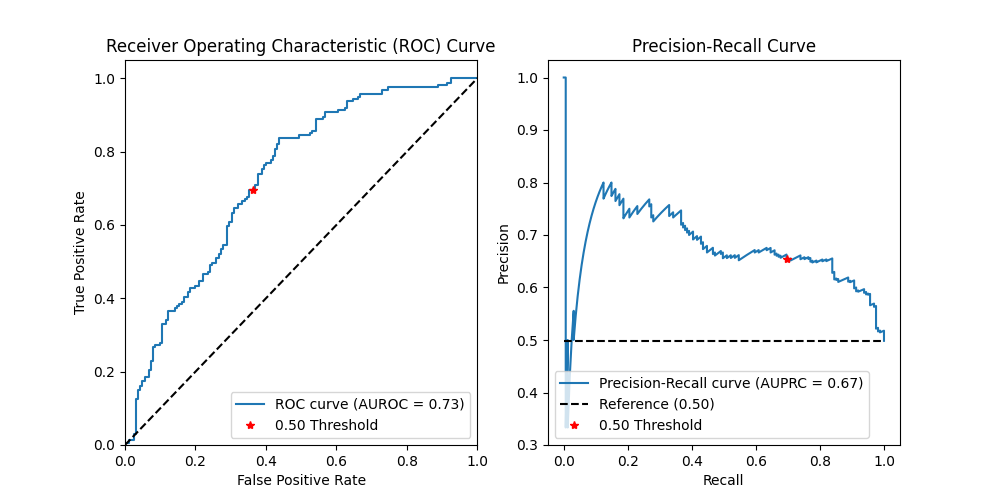

Test Set
Confusion Matrix:
[[44 26]
 [20 49]]
Precision (PPV): 0.65
Negative Predictive Value (NPV): 0.69
Sensitivity (Recall): 0.71
Specificity: 0.63
Accuracy: 0.67

F1 Score: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66        70
           1       0.65      0.71      0.68        69

    accuracy                           0.67       139
   macro avg       0.67      0.67      0.67       139
weighted avg       0.67      0.67      0.67       139


ROC AUC Score: 0.75

PRC AUC Score: 0.74

Average Precision = 0.74


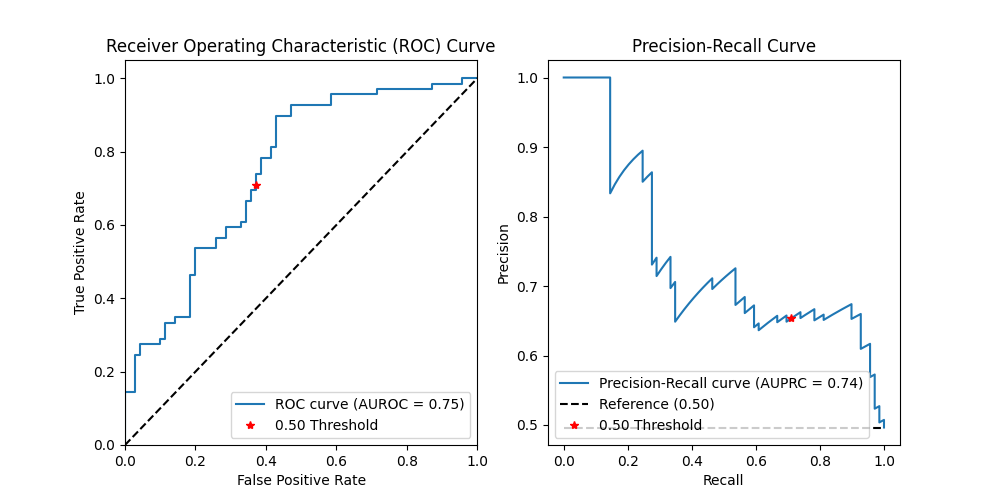

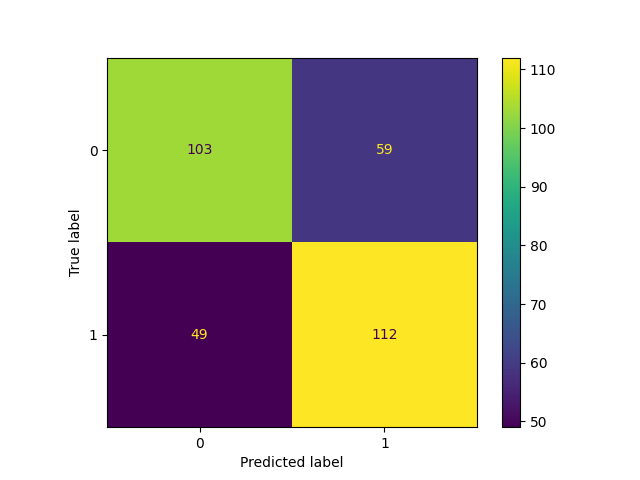

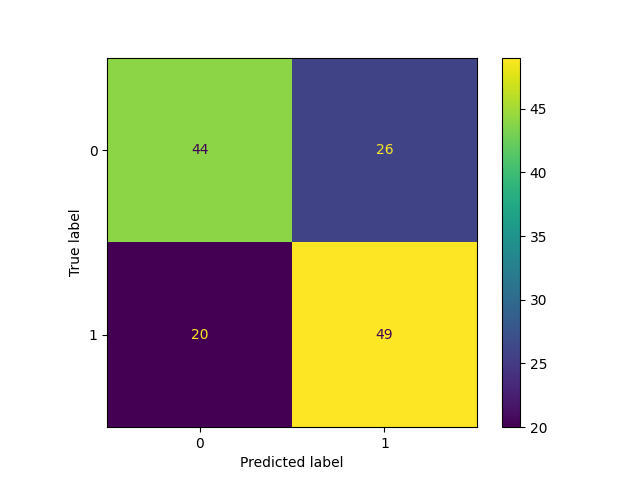

In [ ]:
import numpy as np
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DS[['age','sbp','tobacco_bin','obesity','adiposity']], DS['ldl_cat'],
                                                    test_size=0.3,
                                                    stratify=DS['ldl_cat'],
                                                    random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba_tr = model.predict_proba(X_train)[:, 1]

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba_te = model.predict_proba(X_test)[:, 1]

threshold = .5

print('Traning Set')
assessClassification(y_train, y_pred_proba_tr, threshold)

print('Test Set')
assessClassification(y_test, y_pred_proba_te, threshold)

In [ ]:
def Find_OptimalCutoff_ROC(x, y, threshold):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------
    list type, with optimal cutoff value

    """
    import pandas as pd

    i = np.arange(len(y))
    curve = pd.DataFrame({'tf' : pd.Series(abs(y-(1-x))), 'threshold' : pd.Series(threshold)})
    curve_t = curve.iloc[(curve.tf).argsort()]

    display(curve_t)
    return list(curve_t['threshold'])

def Find_OptimalCutoff_PRC(x, y, threshold):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------
    list type, with optimal cutoff value

    """
    import pandas as pd

    i = np.arange(len(y))
    curve = pd.DataFrame({'tf' : pd.Series(abs(y-x)), 'threshold' : pd.Series(threshold)})
    curve_t = curve.iloc[(curve.tf).argsort()]

    display(curve_t)
    return list(curve_t['threshold'])


# Evaluate the model
def assessClassification(y_true, y_pred_proba, thr_mode=None, thr=.5):
  import matplotlib.pyplot as plt
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
  from sklearn.metrics import precision_recall_curve, average_precision_score, accuracy_score, f1_score
  from sklearn.metrics import precision_score, recall_score, auc

  # Compute ROC curve
  fpr_roc, tpr_roc, thresholds = roc_curve(y_true, y_pred_proba)
  roc_auc = auc(fpr_roc, tpr_roc)
  print(f"\nROC AUC Score: {roc_auc:.2f}")

  # Extract optimal threshold
  if thr_mode=='roc':
    thr = Find_OptimalCutoff_ROC(fpr_roc, tpr_roc, thresholds)
    thr = thr[0]
    print(f"Optimal Threshold is: {thr:.2f}")

  # Compute Precision-Recall curve
  precision_prc, recall_prc, thresholds_prc = precision_recall_curve(y_true, y_pred_proba)
  prc_auc = auc(recall_prc, precision_prc)
  average_precision = average_precision_score(y_true, y_pred_proba)
  proportion = sum(y_true)/len(y_true)
  print(f"\nPRC AUC Score: {prc_auc:.2f}")
  print(f"\nAverage Precision = {average_precision:.2f}")

  # Extract optimal threshold
  if thr_mode=='prc':
    thr = Find_OptimalCutoff_PRC(precision_prc, recall_prc, thresholds_prc)
    thr = thr[0]
    print(f"Optimal Threshold is: {thr:.2f}")


  # Create and display confusion Matrix
  confusion = confusion_matrix(y_true, y_pred_proba>thr)
  tn, fp, fn, tp = confusion.ravel()
  print("Confusion Matrix:")
  print(confusion)

  # Plot Confusion Matrix
  plt.figure()
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=model.classes_)
  disp.plot()
  plt.show()

  # Additional evaluation metrics
  precision = tp / (tp+fp) # a.k.a. positive predictive value (ppv)
  ppv = precision
  npv = tn / (tn+fn)
  sensitivity = tp / (tp+fn) # a.k.a. recall
  specificity = tn / (tn+fp)
  accuracy = (tp+tn) / (tp+tn+fp+fn) # accuracy_score(y_true, y_pred_proba>thr)
  f1 = 2*tp / (2*tp + fn + fp) # f1_score(y_test, y_pred_proba>thr)

  # Plot results
  plt.figure(figsize=(10, 5))

  # ROC Curve
  plt.subplot(1, 2, 1)
  plt.plot(fpr_roc, tpr_roc, label=f'ROC curve (AUROC = {roc_auc:.2f})')
  plt.plot(1-specificity, sensitivity, 'r*', label = f'{thr:.2f} Threshold')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')

  # Precision-Recall Curve
  plt.subplot(1, 2, 2)
  plt.plot(recall_prc, precision_prc, label=f'Precision-Recall curve (AUPRC = {prc_auc:.2f})')
  plt.plot([0, 1], [proportion, proportion], 'k--', label = f'Reference ({proportion:.2f})')
  plt.plot(sensitivity, precision, 'r*', label = f'{thr:.2f} Threshold')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend(loc='lower left')

  plt.show()


  print(f"Precision (PPV): {ppv:.2f}")
  print(f"Negative Predictive Value (NPV): {npv:.2f}")
  print(f"Sensitivity (Recall): {sensitivity:.2f}")
  print(f"Specificity: {specificity:.2f}")
  print(f"Accuracy: {accuracy:.2f}")
  print(f"\nF1 Score: {f1:.2f}")

  # Generate automatic report
  classification_rep = classification_report(y_true, y_pred_proba>thr)
  print("\nClassification Report:")
  print(classification_rep)

  print(f" Considered Threshold is: {thr:.2f}")

  return thr



Traning Set

ROC AUC Score: 0.73


,tf,threshold
71,0.008243,0.532196
72,0.010275,0.524345
73,0.016486,0.523615
74,0.022659,0.513029
70,0.026877,0.533381
...,...,...
3,0.975232,0.834421
2,0.981443,0.843188
1,0.993789,0.891491
0,1.000000,1.891491


Optimal Threshold is: 0.53

PRC AUC Score: 0.68

Average Precision = 0.68
Confusion Matrix:
[[109  53]
 [ 55 106]]


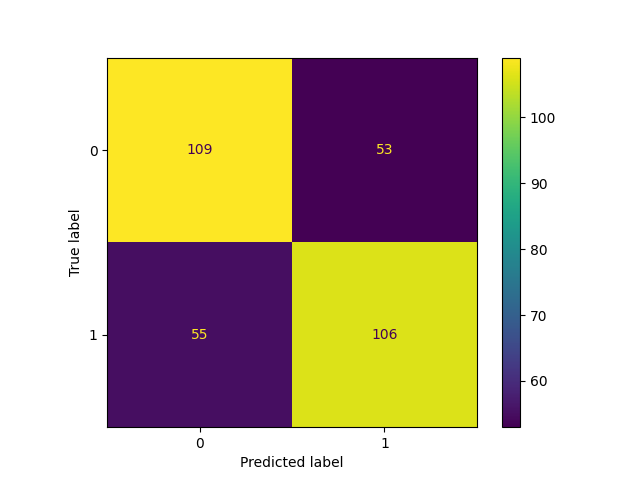

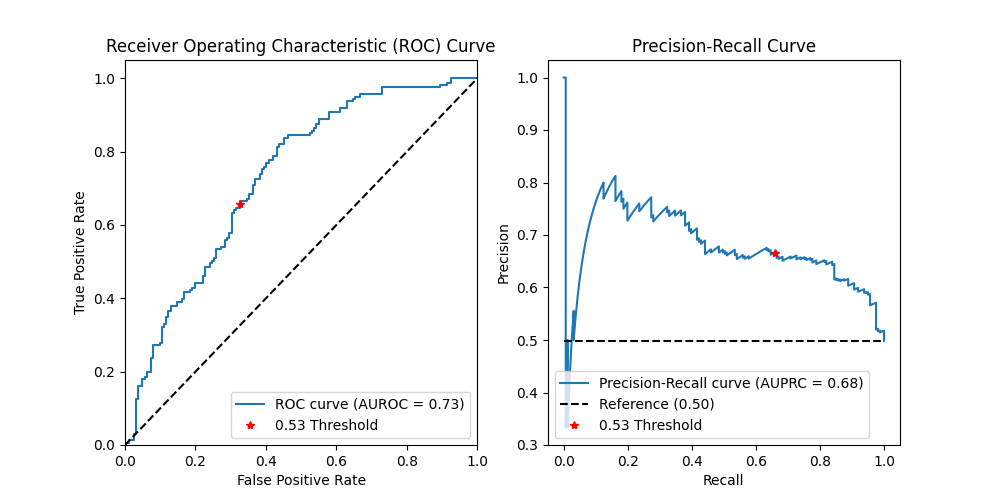

Precision (PPV): 0.67
Negative Predictive Value (NPV): 0.66
Sensitivity (Recall): 0.66
Specificity: 0.67
Accuracy: 0.67

F1 Score: 0.66

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       162
           1       0.67      0.66      0.66       161

    accuracy                           0.67       323
   macro avg       0.67      0.67      0.67       323
weighted avg       0.67      0.67      0.67       323

 Considered Threshold is: 0.53

ROC AUC Score: 0.73

PRC AUC Score: 0.68

Average Precision = 0.68


,tf,threshold
162,0.000000,0.530720
161,0.004102,0.528386
163,0.004154,0.532196
160,0.008155,0.524345
164,0.008282,0.532398
...,...,...
300,0.670807,0.777124
299,0.673654,0.776188
298,0.675776,0.772590
322,0.993789,0.891491


Optimal Threshold is: 0.53
Confusion Matrix:
[[109  53]
 [ 54 107]]


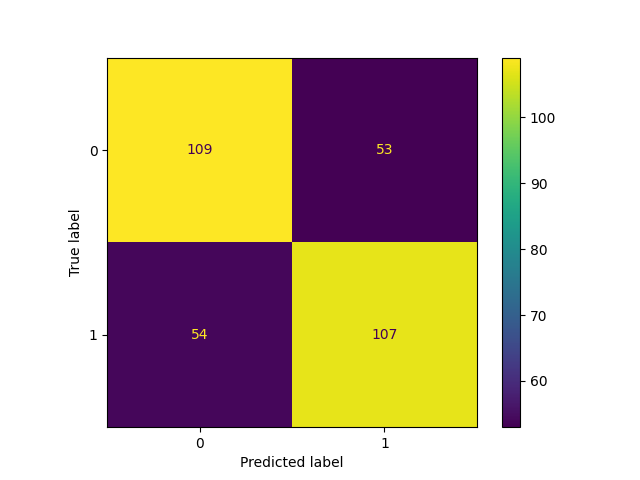

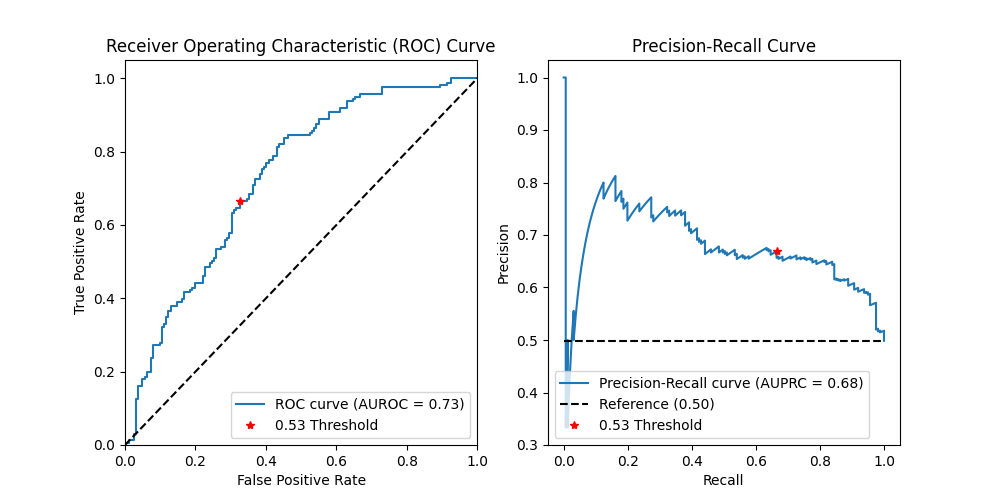

Precision (PPV): 0.67
Negative Predictive Value (NPV): 0.67
Sensitivity (Recall): 0.66
Specificity: 0.67
Accuracy: 0.67

F1 Score: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       162
           1       0.67      0.66      0.67       161

    accuracy                           0.67       323
   macro avg       0.67      0.67      0.67       323
weighted avg       0.67      0.67      0.67       323

 Considered Threshold is: 0.53
0.5321963635914396
0.5307202623783773
Test Set

ROC AUC Score: 0.75

PRC AUC Score: 0.74

Average Precision = 0.74
Confusion Matrix:
[[47 23]
 [28 41]]


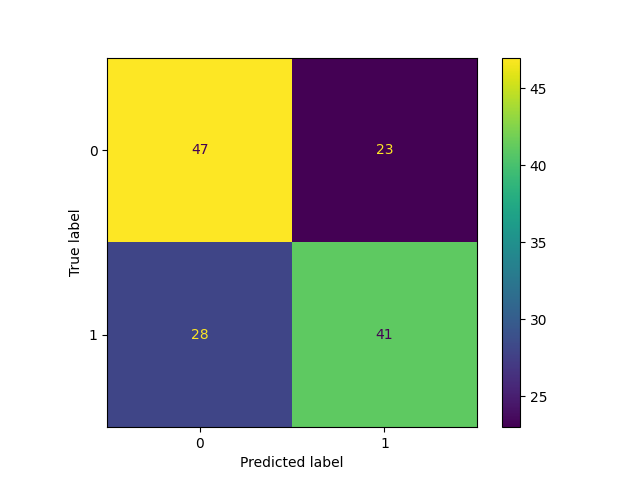

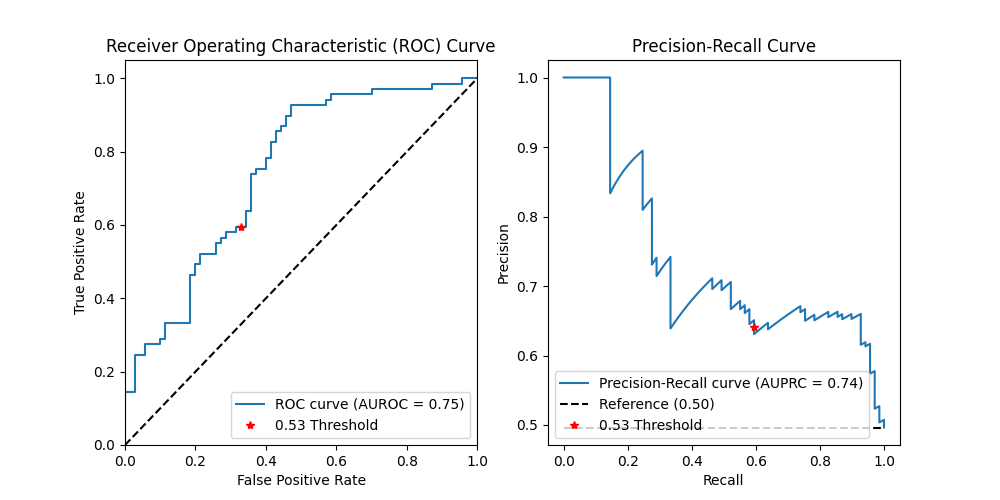

Precision (PPV): 0.64
Negative Predictive Value (NPV): 0.63
Sensitivity (Recall): 0.59
Specificity: 0.67
Accuracy: 0.63

F1 Score: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        70
           1       0.64      0.59      0.62        69

    accuracy                           0.63       139
   macro avg       0.63      0.63      0.63       139
weighted avg       0.63      0.63      0.63       139

 Considered Threshold is: 0.53

ROC AUC Score: 0.75

PRC AUC Score: 0.74

Average Precision = 0.74
Confusion Matrix:
[[47 23]
 [28 41]]


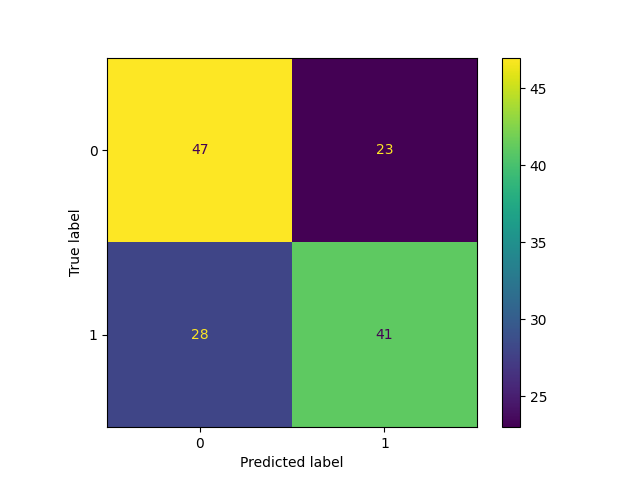

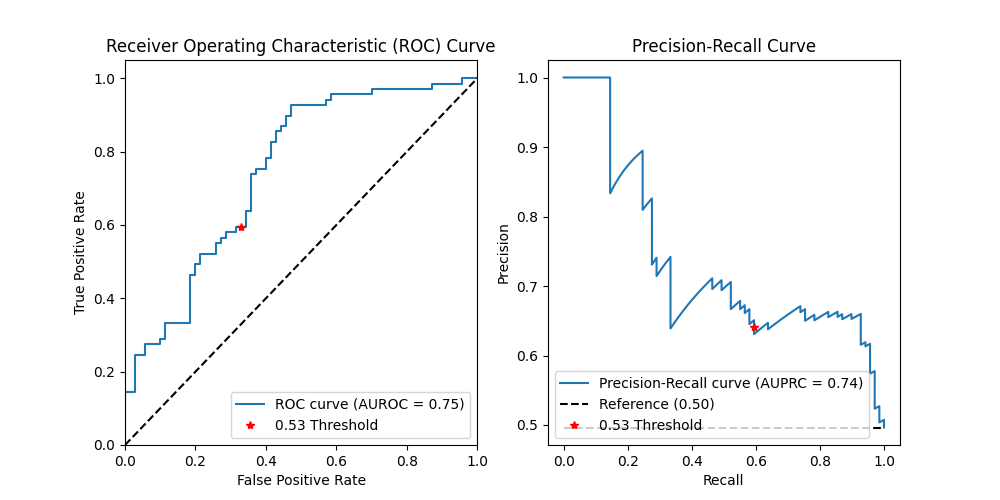

Precision (PPV): 0.64
Negative Predictive Value (NPV): 0.63
Sensitivity (Recall): 0.59
Specificity: 0.67
Accuracy: 0.63

F1 Score: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        70
           1       0.64      0.59      0.62        69

    accuracy                           0.63       139
   macro avg       0.63      0.63      0.63       139
weighted avg       0.63      0.63      0.63       139

 Considered Threshold is: 0.53


0.5307202623783773

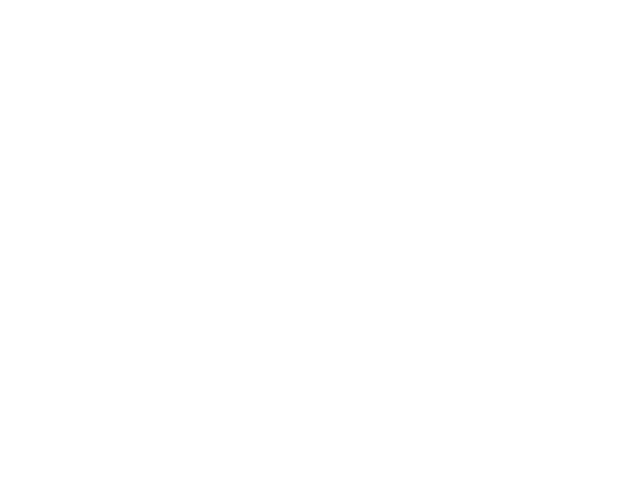

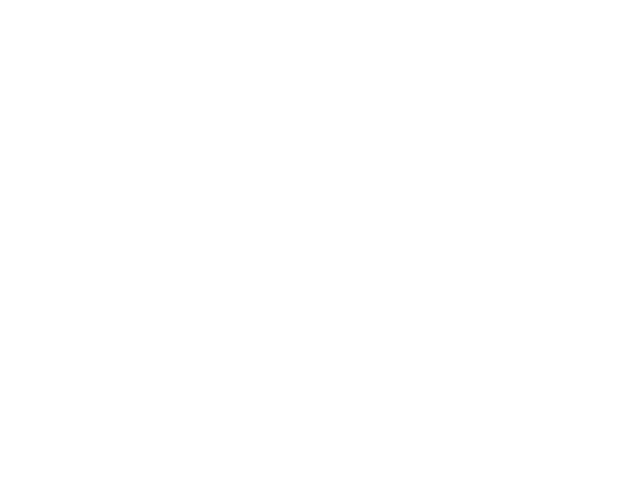

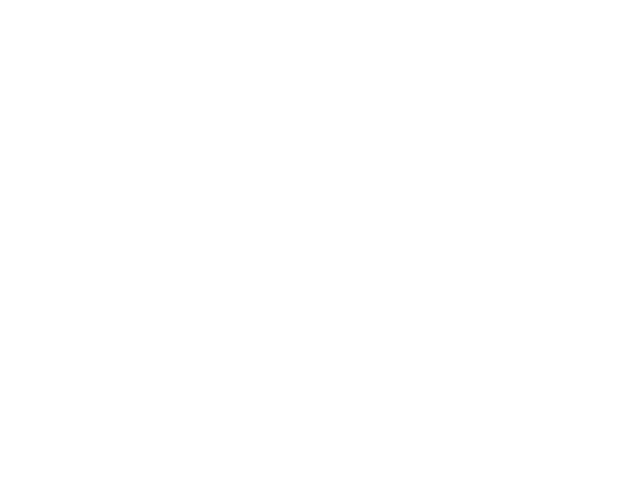

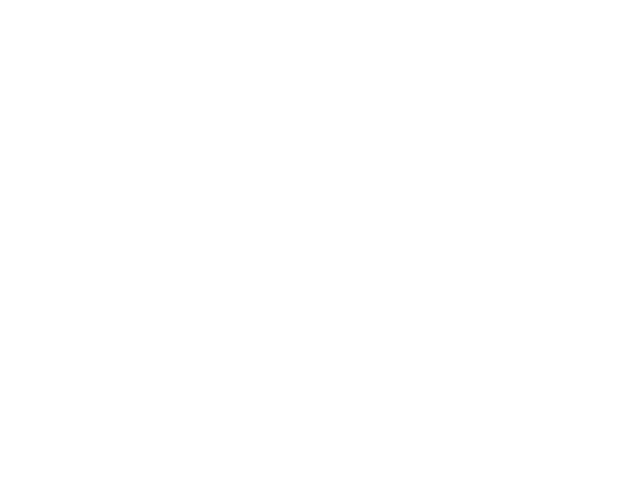

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(DS[['age','sbp','tobacco_bin','obesity','adiposity']], DS['ldl_cat'],
                                                    test_size=0.3,
                                                    stratify=DS['ldl_cat'],
                                                    random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba_tr = model.predict_proba(X_train)[:, 1]

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba_te = model.predict_proba(X_test)[:, 1]

threshold = .5

print('Traning Set')
thr_roc = assessClassification(y_train, y_pred_proba_tr, thr_mode='roc')
thr_prc = assessClassification(y_train, y_pred_proba_tr, thr_mode='prc')
print(thr_roc)
print(thr_prc)

print('Test Set')
assessClassification(y_test, y_pred_proba_te, thr=thr_roc)
assessClassification(y_test, y_pred_proba_te, thr=thr_prc)


In this code:

We load the Iris dataset and convert it into a binary classification problem by classifying whether a sample is Setosa (class 0) or not Setosa (class 1).

The data is split into training and testing sets.

The features are standardized to have a mean of 0 and standard deviation of 1.

We train a logistic regression model, make predictions, and evaluate the model using a confusion matrix, classification report, ROC AUC score, and accuracy.

Finally, we plot the ROC curve to visualize the model's performance.

You can adapt this code to your specific dataset and binary classification problem.

In this updated code:

We calculate and plot the precision-recall curve and compute the average precision (AP).

The additional evaluation metrics, such as F1 score, precision (PPV), negative predictive value (NPV), sensitivity (recall), and specificity, are computed and displayed.

### Apply Cross-Validation to have an estimate of the overall error

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import shapiro  # We'll use the Shapiro-Wilk test for normality

# train-test split (70% train, 30% test)

#X_train, X_test, y_train, y_test = train_test_split(DS[['age','sbp','tobacco_bin','obesity']], DS['adiposity'], test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(DS[['age','sbp','tobacco_bin','obesity','ldl','alcohol','typea']], DS['adiposity'], test_size=0.3, random_state=42)

# Create Linear Regression Model
model = LinearRegression()

# Compute internal cross-validation to quantify internal error
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print Internal Validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


## Perform Non-Linear Regression
### E.g. KNN regression

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import shapiro  # We'll use the Shapiro-Wilk test for normality
from sklearn.neighbors import KNeighborsRegressor

# train-test split (70% train, 30% test)

#X_train, X_test, y_train, y_test = train_test_split(DS[['age','sbp','tobacco_bin','obesity']], DS['adiposity'], test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(DS[['age','sbp','tobacco_bin','obesity','ldl','alcohol','typea']], DS['adiposity'], test_size=0.3, random_state=42)

# Create Linear Regression Model
model = KNeighborsRegressor()

# Compute internal cross-validation to quantify internal error
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print Internal Validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Define Hyperparameters Grid
param_grid = {'n_neighbors':[2,3,4,5,6],
              'weights':['uniform','distance'],
              'metric': ['minkowski','euclidean','cosine']}

# Create an optimization object
grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation

# Fit the model while optimizing the hyperparameters with a grid search.
grid_search.fit(X_train, y_train)

# Return the optimal model
best_model = grid_search.best_estimator_

# Return Grid Search scores
grid_train_score = grid_search.best_score_  # Convertiamo in errore quadratico medio

# Print Grid Search scores
print(f"GridSearchCV Mean Squared Error (Training): {grid_train_score}")

# Compute predictions on training and tests sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


In [ ]:
# Apply on Training data
assessFit(y_train,y_train_pred)

In [ ]:
# Apply on Test data
assessFit(y_test,y_test_pred)


# Hands-On Session

### Perform a similar analysis to the one we have observed so far considering the following model

In [ ]:
%%tikz -S test_output.tikz -f svg
\draw (1,0.5) circle (1);
\filldraw (1, 0.5) node {AGE};

\draw[thick,->] (2,0.5) -- (3,0.5);

\draw (3,0) rectangle (6,1);
\filldraw (4.5, 0.75) node {LOGISTIC};
\filldraw (4.5, 0.25) node {REGRESSION};

\draw[thick,->] (6,0.5) -- (7,0.5);

\draw (8,0.5) circle (1);
\filldraw (8, 0.5) node {CHD};